**To Predict The Future Stock Price Of Google**

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#uploading the training data set
dataset_train=pd.read_csv('Downloads/Google_Stock_Price_Train.csv')

In [3]:
#training set
training_set=dataset_train.iloc[:,1:2].values


In [4]:
#feature scalling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)


In [5]:
#building the RNN
#creating the data strucutures with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,Y_train=np.array(x_train),np.array(y_train)

    

In [6]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

**BUILDING THE RNN**

In [7]:
#importing the keras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
#initilasing the rnn
regressor=Sequential()

In [9]:
#adding the first LSTM layer and droupout regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [10]:
#adding the second LSTM layer and dropout regulaization
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))


In [11]:
#adding the third LSTM layer and dropout regulaization
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))



In [12]:
#adding the fourth LSTM layer and dropout regulaization
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

In [13]:
#adding the output layer
regressor.add(Dense(units=1))

In [14]:
#compiling the ann with optimizer
regressor.compile(optimizer='adam',loss='mean_squared_error')


In [15]:
#fitting the rnn to the training set
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 57ms/step - loss: 0.0444
Epoch 2/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

**Making the Predictions and Visualising the Results**

In [16]:
#Getting the real stock price of 2017
dataset_test=pd.read_csv('Downloads/Google_Stock_Price_Test.csv')
test_set=dataset_test.iloc[:,1:2].values


In [26]:
#getting the predicted stock price of 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)  
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 26ms/step


**Visualising the Results**

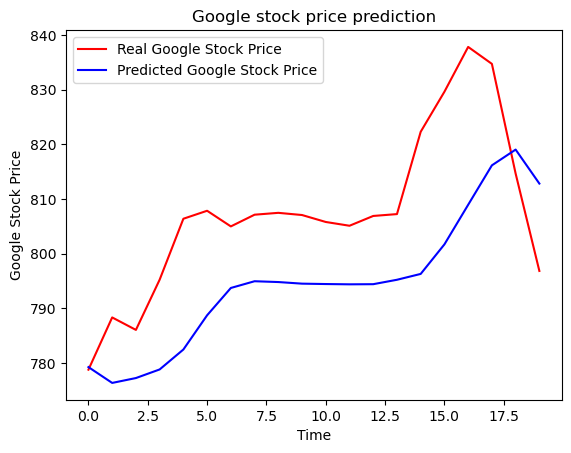

In [29]:
plt.plot(test_set,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()